In [65]:
import cv2
import torch
import os
import matplotlib.pyplot as plt
from cv2 import dnn_superres
import numpy as np
from PIL import Image, ImageEnhance

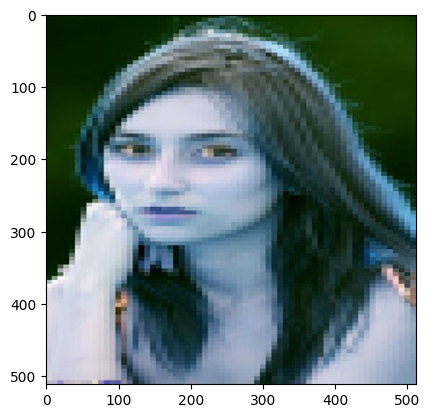

In [51]:
PARENT_DIR = os.path.dirname(os.getcwd())
IMAGES_DIR = os.path.join(PARENT_DIR, 'images')

temp_low_1 = os.path.join(IMAGES_DIR, 'low_3.jpg')
low1 = cv2.imread(temp_low_1)

plt.imshow(low1)

resized_img = cv2.resize(low1, (512, 512), interpolation=cv2.INTER_CUBIC)

plt.imshow(resized_img)


In [52]:
sr = dnn_superres.DnnSuperResImpl_create()

# read pre-trained model
model_path = os.path.join(os.getcwd(), 'EDSR_x2.pb')
sr.readModel(model_path)

# load model
# sr.setModel('fsrcnn', 2)
# result = sr.upsample(low1)

# save image
# cv2.imwrite(os.path.join(IMAGES_DIR, 'new11.jpg'), result)
# plt.imshow(low1)
# plt.show


### Brightness and construst

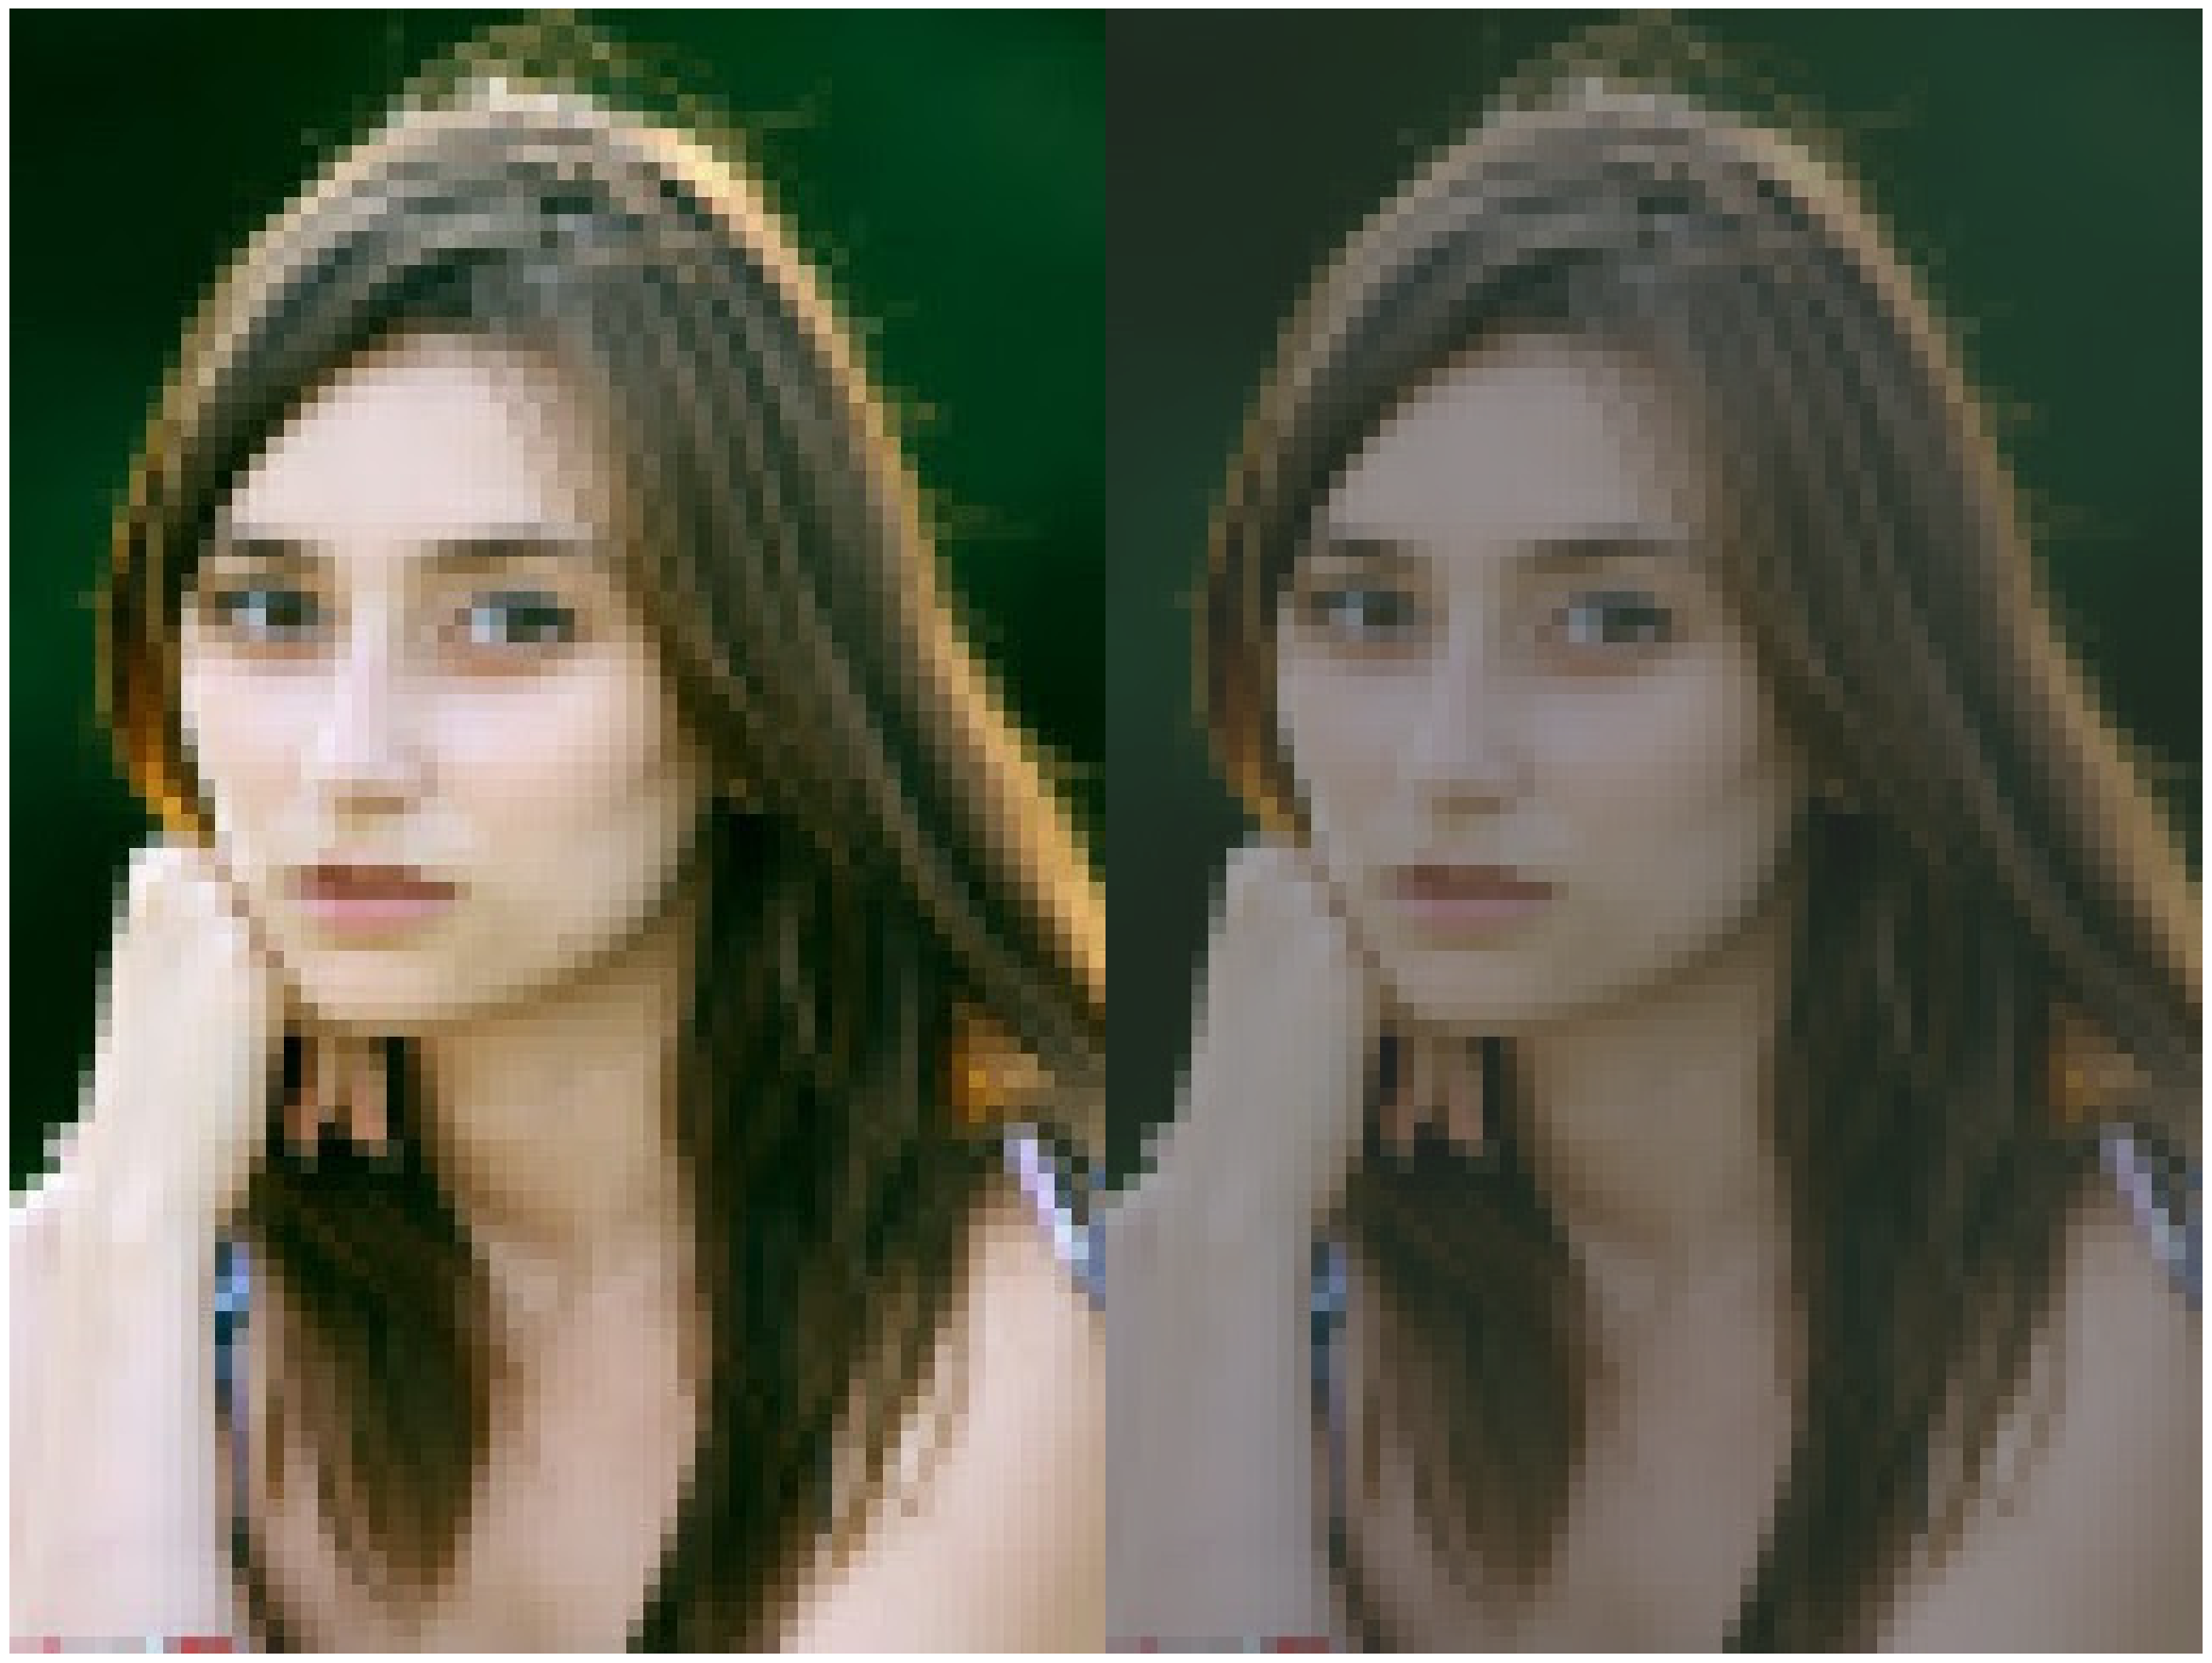

In [53]:
enhanced_image = cv2.addWeighted(low1, 0.5, low1, 0, 30)
original_and_enhanced_image = np.hstack((low1, enhanced_image))

plt.figure(figsize=[30, 30])
plt.axis('off')
plt.imshow(original_and_enhanced_image[:, :, ::-1])

### Sharping images

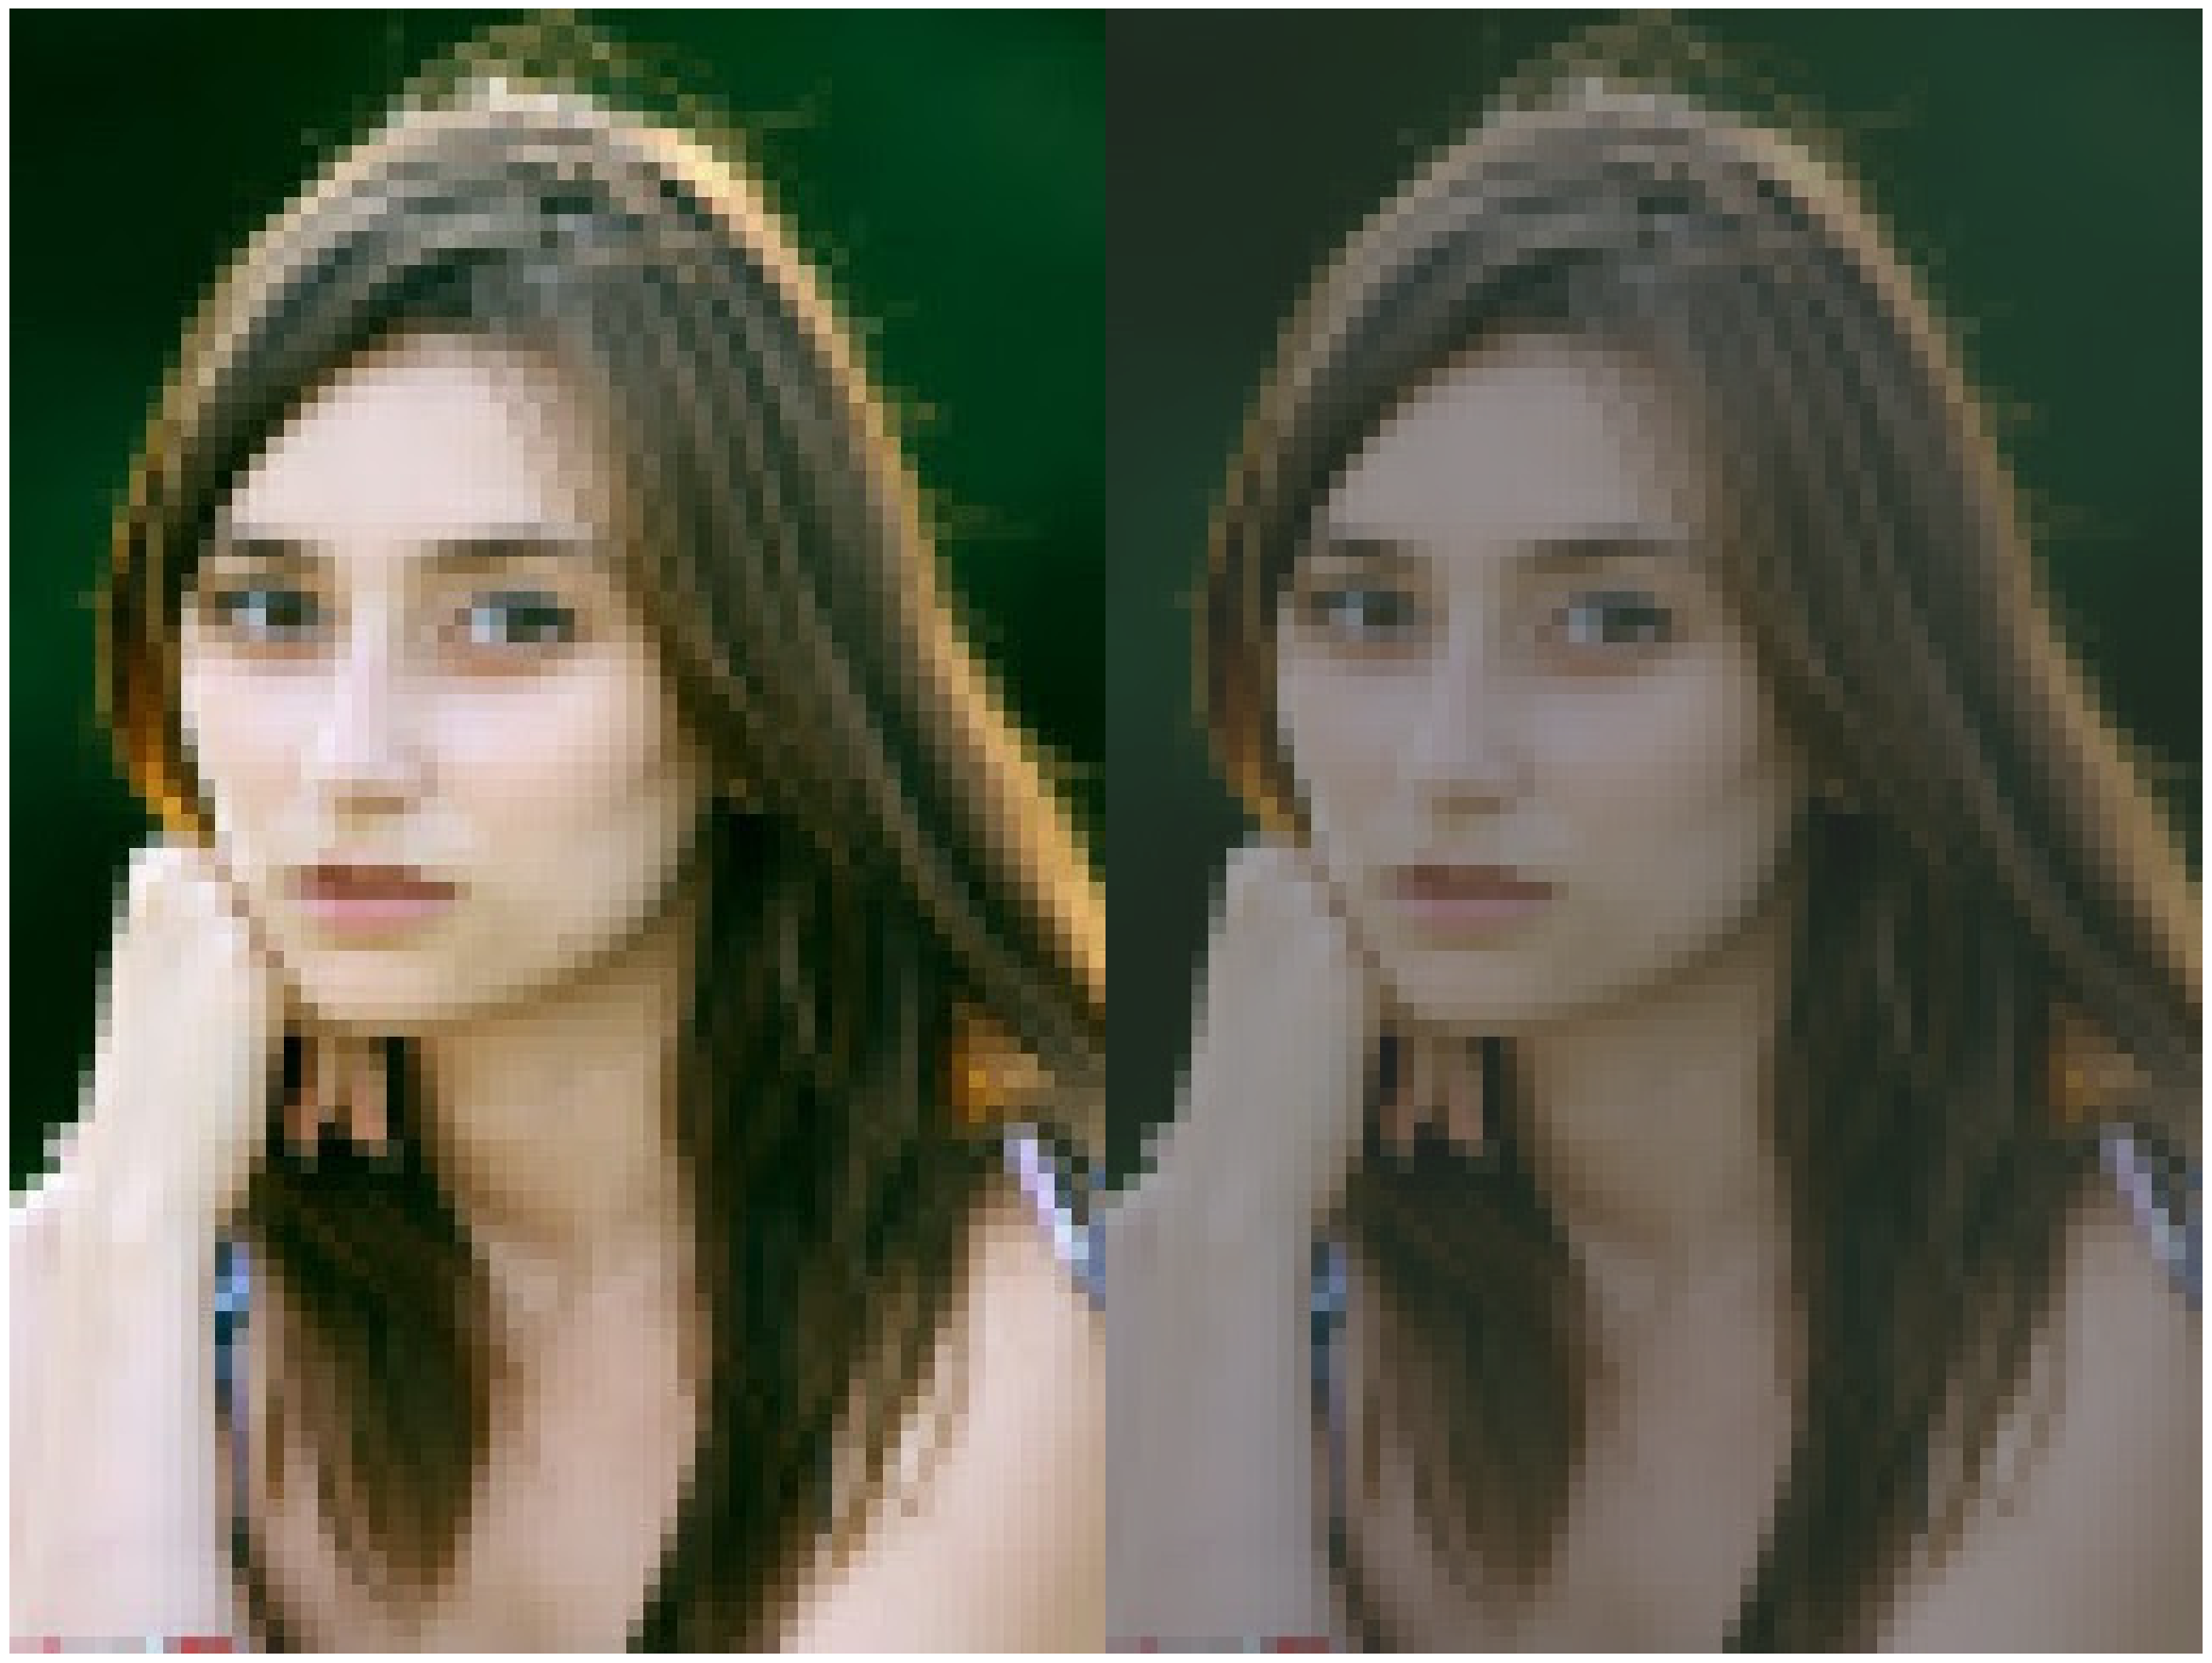

In [58]:
def sharpen_image(image):
    kernel = np.array([
        [-1, -1, -1],
        [-1, 9, -1],
        [-1, -1, -1]
    ])
    return cv2.filter2D(image, -1, kernel)

sharped_image = sharpen_image(low1)

original_and_sharped_image = np.hstack((low1, sharped_image))

plt.figure(figsize=[30, 30])
plt.axis('off')
plt.imshow(original_and_enhanced_image[:, :, ::-1])
plt.show()

### Enhancing with pillow

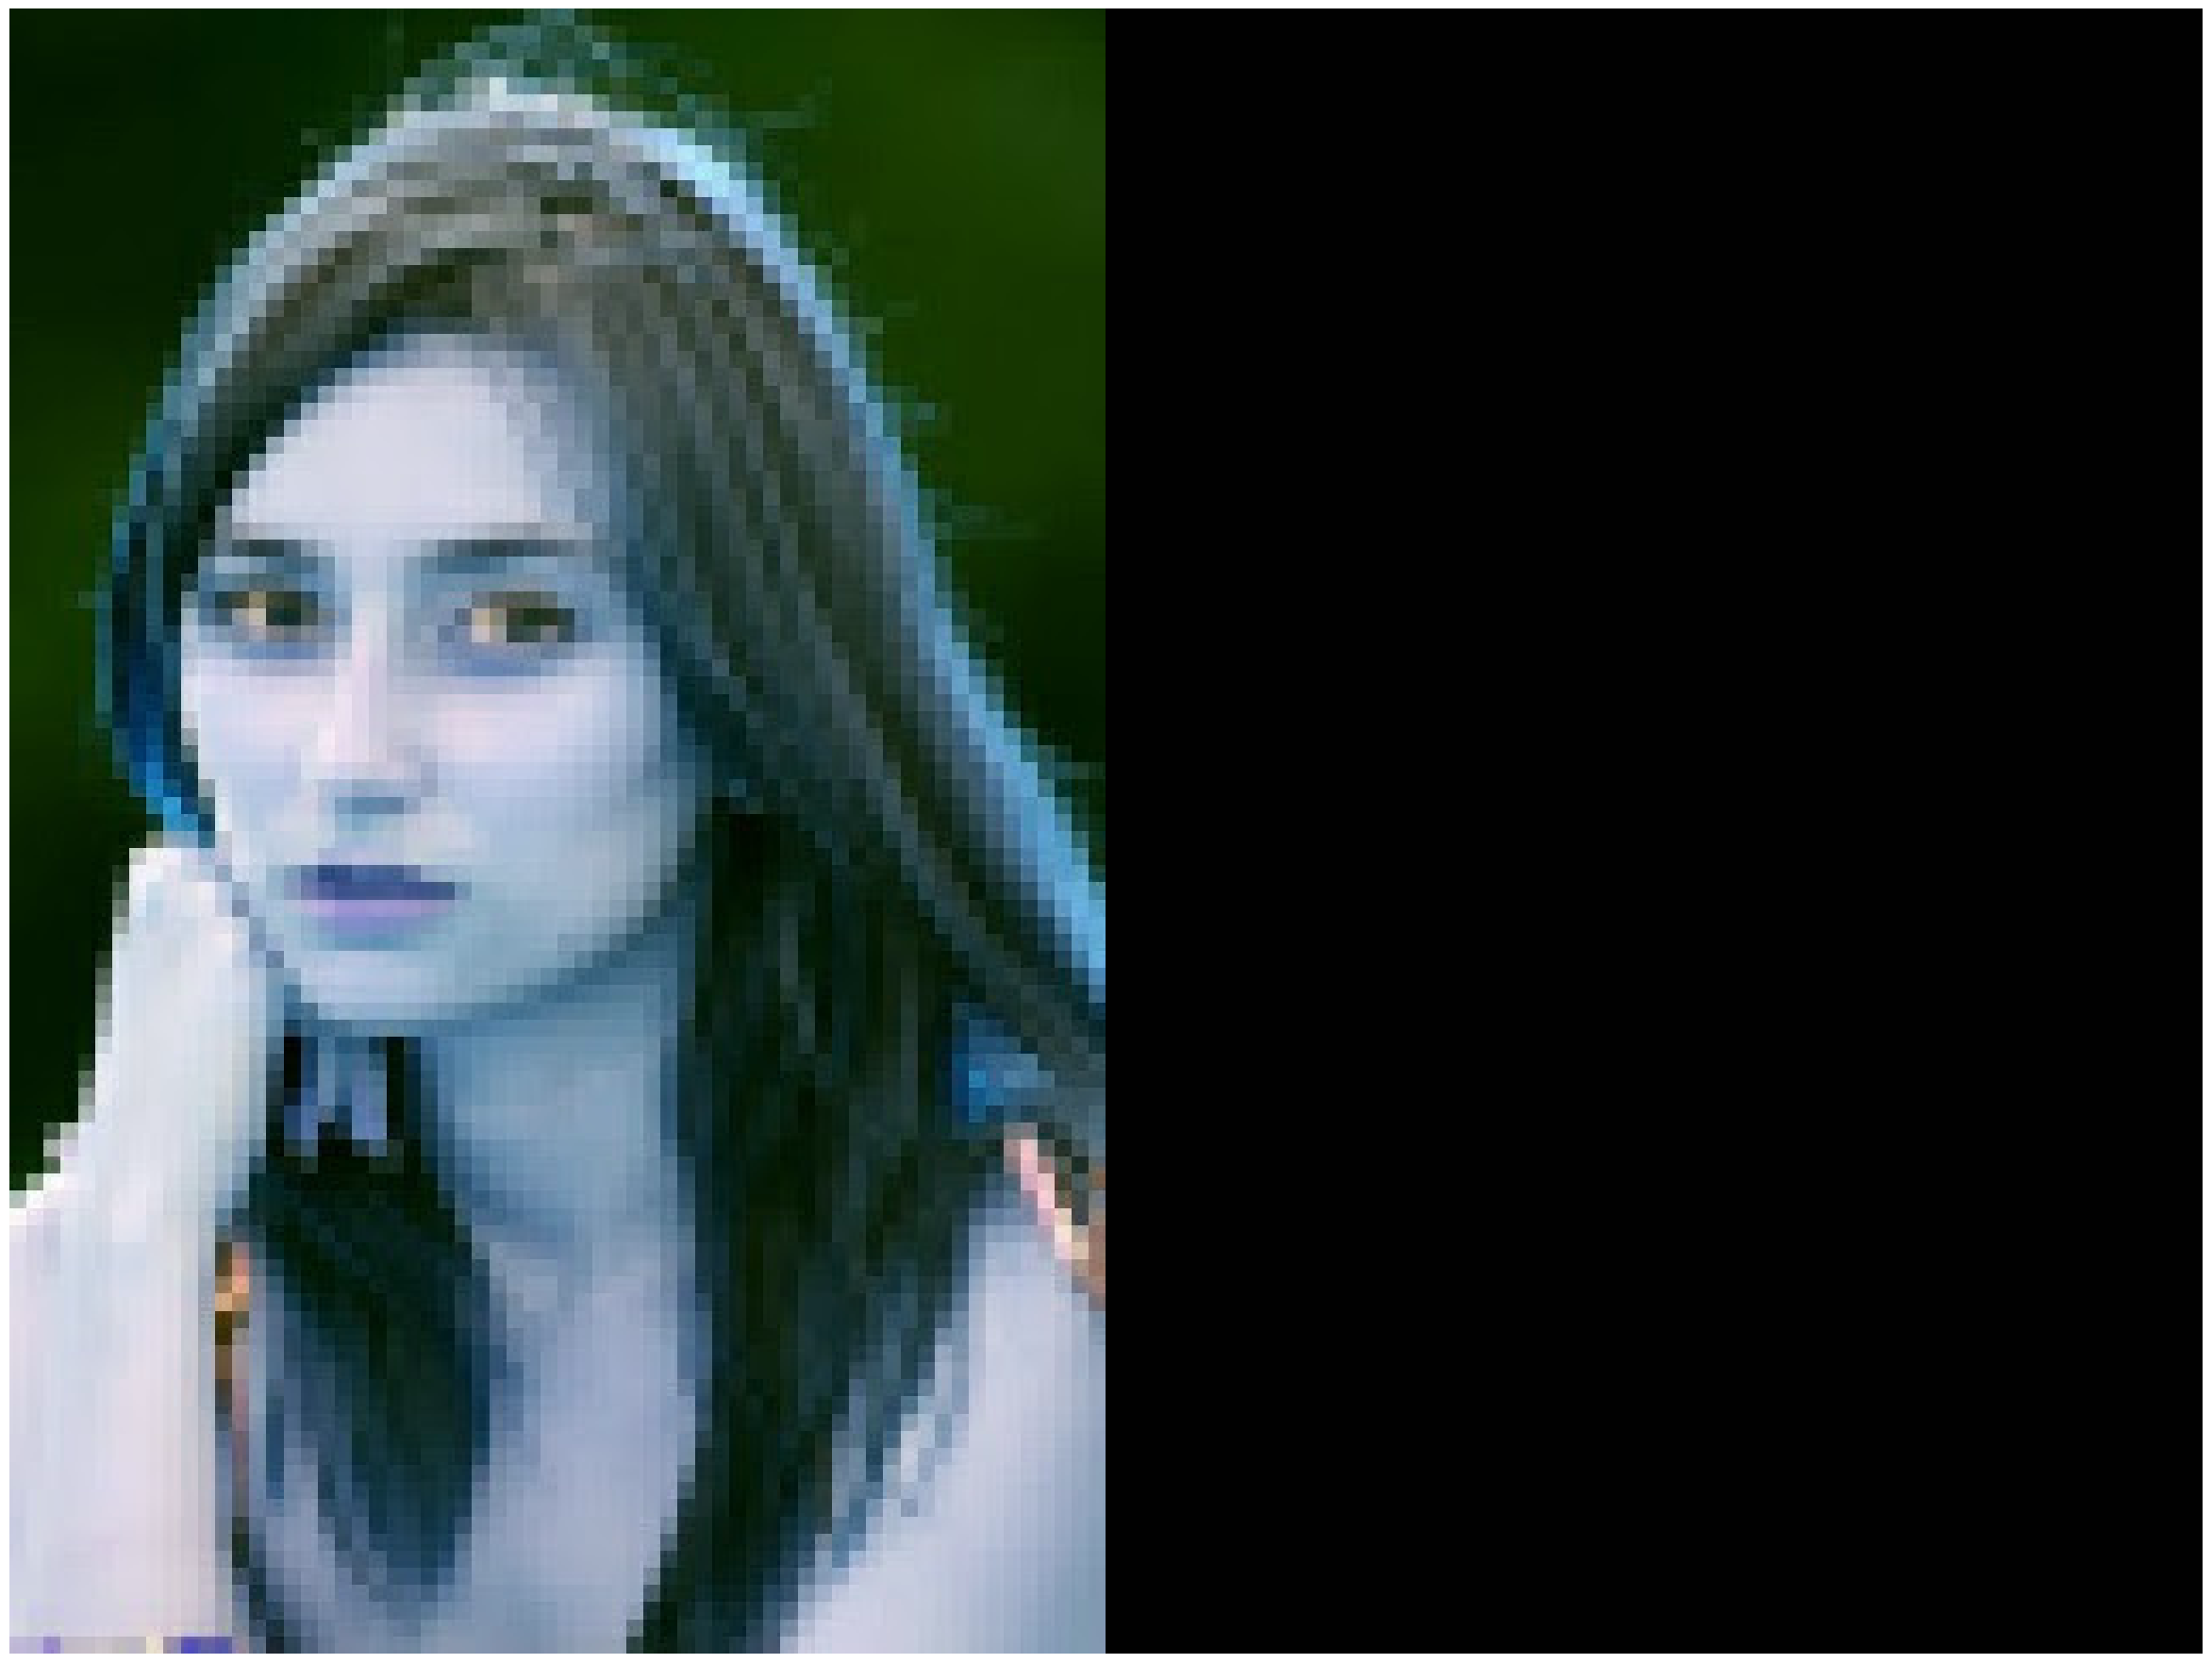

In [75]:
def adjust_brightness(image, factor):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)


image_low_1 = Image.fromarray(np.ones((480, 320, 3),  dtype=np.uint8))

enhanced_image = adjust_brightness(image_low_1, 1.5)

original_and_enhanced_image = np.hstack([low1, enhanced_image])

plt.figure(figsize=[30, 30])
plt.axis('off')
plt.imshow(original_and_enhanced_image)

In [76]:
def adjust_contrust(image, factor):
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

enhanced_contrast = adjust_contrust(low1, 1.5)

original_and_enhanced_contrast = np.hstack((low1, enhanced_contrast))

plt.figure(figsize=[30, 30])
plt.axis('off')
plt.imshow(original_and_enhanced_contrast)

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [102]:
import keyboard

import keyboard
while True:
    if keyboard.read_key() == "a":
        print("You pressed 'a'.")
        break

ImportError: You must be root to use this library on linux.